In [2]:
# Import the data
import pandas as pd
import numpy as np

# Graph plotting
import matplotlib.pyplot as plt
import seaborn as sns

# import the function StandardScaler
from sklearn.preprocessing import StandardScaler

# Kmeans clustering
from sklearn.cluster import KMeans

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
def ElbowPlot(X, k_min, k_max):
    wss = [ ]
    for i in range(k_min, k_max+1):
        kmeans = KMeans(n_clusters = i, random_state = 2600)
        kmeans.fit(X)
        wss.append(kmeans.inertia_)
    plt.figure(figsize=(10,10))
    plt.plot(range(k_min, k_max+1), wss, '-o')
    plt.title('Elbow Plot')
    plt.xlabel('Number of cluster k')
    plt.ylabel('Within group Sum of Square')

# Import Data

In [4]:
url = 'https://docs.google.com/spreadsheets/d/1_A1etyl46cHWIU1wMcQ3EL0pfFz40KA6/edit?usp=sharing&ouid=104281439514443270362&rtpof=true&sd=true'
data_path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]


In [5]:
card = pd.read_excel(data_path, index_col = 0)
card.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
card.columns[card.dtypes == object]

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [7]:
card_existing = card[card.Attrition_Flag == "Existing Customer"]

In [8]:
card_c = card_existing.drop(columns = card.columns[card.dtypes == object])
card_c.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,
768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [9]:
card_c[['Total_Trans_Ct','Total_Trans_Amt',   'Months_Inactive_12_mon','Months_on_book']].describe().round()

,Total_Trans_Ct,Total_Trans_Amt,Months_Inactive_12_mon,Months_on_book
count,8500.0,8500.0,8500.0,8500.0
mean,69.0,4655.0,2.0,36.0
std,23.0,3513.0,1.0,8.0
min,11.0,816.0,0.0,13.0
25%,54.0,2385.0,1.0,31.0
50%,71.0,4100.0,2.0,36.0
75%,82.0,4781.0,3.0,40.0
max,139.0,18484.0,6.0,56.0


In [10]:
card_d = pd.DataFrame(StandardScaler().fit_transform(card_c), index = card_c.index, columns = card_c.columns)

In [11]:
card_d.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,8.500000e+03,8.500000e+03,8.500000e+03,8.500000e+03,8.500000e+03,8.500000e+03,8.500000e+03,8.500000e+03,8.500000e+03,8.500000e+03,8.500000e+03,8.500000e+03,8.500000e+03,8.500000e+03
mean,2.047317e-16,2.007270e-15,-2.286798e-16,2.462605e-15,2.880376e-16,5.581862e-15,-1.882285e-16,4.088494e-16,1.482736e-16,-1.744160e-16,1.747778e-15,6.213226e-15,-4.447945e-16,3.956443e-16
std,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00
min,-2.507476e+00,-1.792126e+00,-2.852465e+00,-1.906381e+00,-2.236457e+00,-2.179040e+00,-8.023149e-01,-1.658444e+00,-8.204205e-01,-2.371808e+00,-1.092835e+00,-2.516513e+00,-3.132918e+00,-1.087543e+00
25%,-6.511973e-01,-1.024755e+00,-6.084507e-01,-5.982161e-01,-1.252865e+00,-3.295378e-01,-6.742166e-01,-6.026180e-01,-6.917221e-01,-5.947067e-01,-6.462244e-01,-6.402306e-01,-5.500505e-01,-8.857464e-01
50%,-3.243757e-02,-2.573850e-01,1.488676e-02,5.586633e-02,-2.692729e-01,-3.295378e-01,-4.494916e-01,1.417392e-01,-4.402677e-01,-1.355075e-01,-1.579062e-01,1.015554e-01,-9.399235e-02,-3.133781e-01
75%,7.100741e-01,5.099852e-01,5.135567e-01,7.099488e-01,7.143194e-01,5.952133e-01,2.780440e-01,7.264027e-01,2.759919e-01,4.017556e-01,3.604035e-02,5.815345e-01,3.971472e-01,8.542899e-01
max,3.308865e+00,2.044726e+00,2.508236e+00,1.364031e+00,3.665096e+00,2.444716e+00,2.838825e+00,1.663448e+00,2.976265e+00,1.205164e+01,3.937106e+00,3.068699e+00,1.303084e+01,2.559470e+00


In [12]:
card_d.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [13]:
x = card_d[['Months_on_book', 'Total_Trans_Amt']]

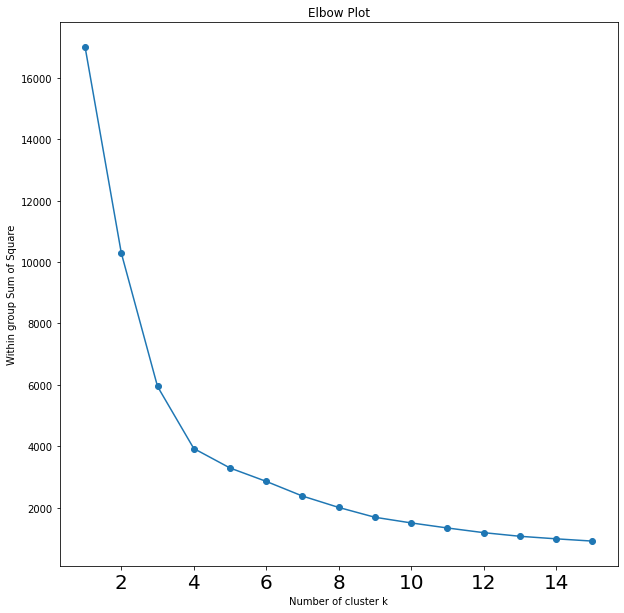

In [14]:
ElbowPlot(x, k_min = 1, k_max = 15)
plt.xticks(fontsize=20)
plt.savefig("Elbow_Plot_Credit_card.png")

In [15]:
kmeans_x = KMeans(n_clusters=4, random_state = 2600).fit(x)
x_label = x.copy()
x_label["Label"] = kmeans_x.labels_
x_label.head()

,Months_on_book,Total_Trans_Amt,Label
CLIENTNUM,,,
768805383,0.388889,-0.999456,1
818770008,1.012227,-0.957606,2
713982108,0.014887,-0.787930,1
769911858,-0.234448,-0.991770,1
709106358,-1.855126,-1.092835,3


In [16]:
x_label.groupby("Label").mean()

,Months_on_book,Total_Trans_Amt
Label,,
0,-0.107128,2.849403
1,0.008198,-0.212945
2,1.354667,-0.366535
3,-1.363242,-0.346987


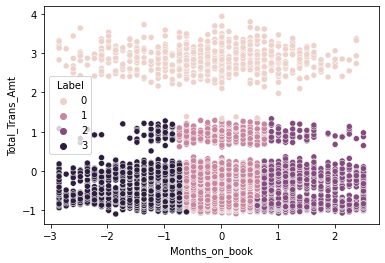

In [17]:
sns.scatterplot('Months_on_book', 'Total_Trans_Amt', data=x_label, hue='Label')

plt.show()

In [18]:
full = card_d[['Total_Trans_Ct','Total_Trans_Amt',   'Months_Inactive_12_mon','Months_on_book']] #'Total_Trans_Ct',

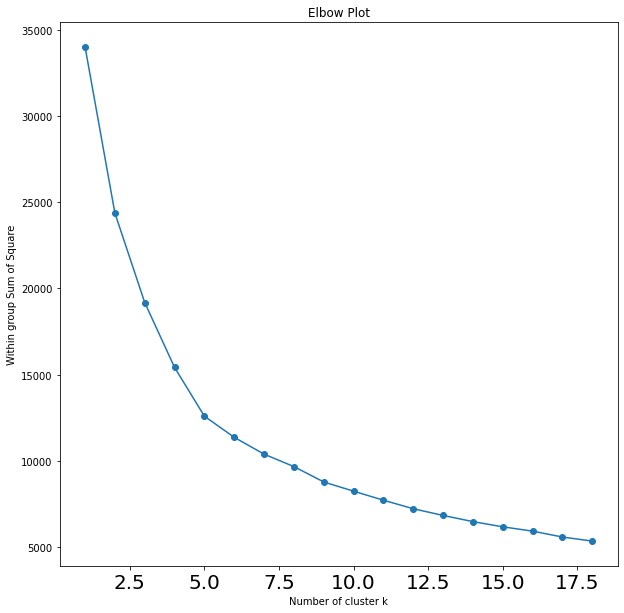

In [19]:
ElbowPlot(full, k_min = 1, k_max = 18)
plt.xticks(fontsize=20)
plt.savefig("Elbow_Plot_Credit_card_full.png")

In [20]:
kmeans_full = KMeans(n_clusters=5, random_state = 2600).fit(full)
full_label = full.copy()
full_label["Label"] = kmeans_full.labels_
full_label.sample(n=5)

,Total_Trans_Ct,Total_Trans_Amt,Months_Inactive_12_mon,Months_on_book,Label
CLIENTNUM,,,,,
780416433,-1.338382,-0.707647,-1.252865,-1.356456,3
778742358,0.319728,0.814887,-0.269273,-1.481123,3
720846558,-1.032941,-0.609997,0.714319,0.014887,2
779978283,0.406997,-0.064527,-0.269273,-0.234448,4
710670633,-1.556554,-0.718465,0.714319,0.014887,2


In [21]:
full_label["Label"].value_counts()

4    2522
0    2106
2    1650
3    1451
1     771
Name: Label, dtype: int64

In [22]:
full_label.groupby("Label").mean().round(2)

,Total_Trans_Ct,Total_Trans_Amt,Months_Inactive_12_mon,Months_on_book
Label,,,,
0,0.24,-0.07,1.08,0.25
1,1.81,2.81,-0.06,-0.11
2,-1.38,-0.85,-0.12,0.56
3,-0.32,-0.41,-0.14,-1.42
4,0.33,-0.01,-0.73,0.28


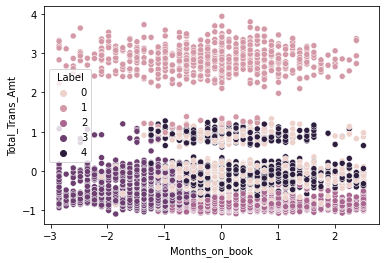

In [23]:
sns.scatterplot('Months_on_book', 'Total_Trans_Amt', data=full_label, hue='Label')

plt.show()